## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/TDOC.csv')
df.head()

,Date,Close
0,7/2/2018,59.400002
1,7/3/2018,59.849998
2,7/5/2018,62.799999
3,7/6/2018,63.349998
4,7/9/2018,65.150002


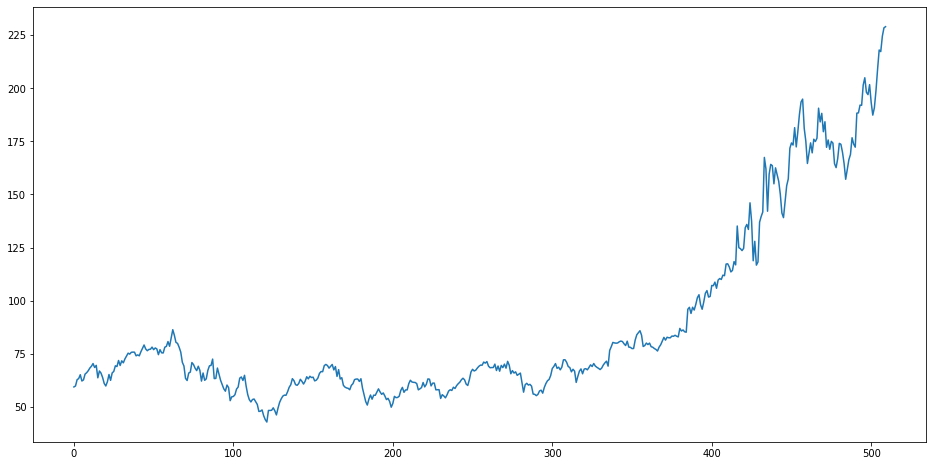

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,59.400002
1,2018-07-03,59.849998
2,2018-07-05,62.799999
3,2018-07-06,63.349998
4,2018-07-09,65.150002


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.0754
Epoch 2/5
8/8 - 1s - loss: 0.0229
Epoch 3/5
8/8 - 1s - loss: 0.0200
Epoch 4/5
8/8 - 1s - loss: 0.0139
Epoch 5/5
8/8 - 1s - loss: 0.0120


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0105
Loss: 0.0105309272184968


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[74.14497 ],
       [73.9151  ],
       [56.263447],
       [54.050007],
       [65.30948 ],
       [52.02867 ],
       [62.250183],
       [59.59936 ],
       [63.155224],
       [59.70579 ],
       [53.947517],
       [60.51449 ],
       [75.50939 ],
       [74.28142 ],
       [73.22866 ],
       [74.15775 ],
       [74.83362 ],
       [59.45235 ],
       [60.646263],
       [60.718395],
       [52.69147 ],
       [66.0415  ],
       [57.07853 ],
       [67.10179 ],
       [54.691196],
       [59.05241 ],
       [63.061386],
       [64.9139  ],
       [67.13417 ],
       [66.6434  ],
       [65.72322 ],
       [74.24937 ],
       [58.96608 ],
       [65.69897 ],
       [62.379044],
       [65.188934],
       [59.45397 ],
       [68.019196],
       [65.14069 ],
       [61.70733 ],
       [59.590195],
       [65.41329 ],
       [58.260944],
       [61.743702],
       [75.67743 ],
       [64.61462 ],
       [62.967857],
       [74.82683 ],
       [73.86375 ],
       [55.558582],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,74.144974
1,73.915100
2,56.263447
3,54.050007
4,65.309479
...,...
73,65.494560
74,66.162888
75,65.627022
76,56.977375


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[78.040001],
       [69.25    ],
       [47.990002],
       [44.009998],
       [69.339996],
       [48.330002],
       [62.59    ],
       [63.5     ],
       [68.699997],
       [62.450001],
       [59.240002],
       [63.029999],
       [83.739998],
       [78.160004],
       [79.709999],
       [77.449997],
       [79.900002],
       [60.970001],
       [59.889999],
       [58.099998],
       [55.470001],
       [68.989998],
       [54.029999],
       [69.239998],
       [60.43    ],
       [54.27    ],
       [58.09    ],
       [60.560001],
       [69.199997],
       [68.540001],
       [63.75    ],
       [83.720001],
       [63.      ],
       [65.589996],
       [63.57    ],
       [69.150002],
       [64.089996],
       [67.089996],
       [71.099998],
       [61.990002],
       [58.41    ],
       [67.190002],
       [58.669998],
       [70.389999],
       [78.879997],
       [69.639999],
       [60.610001],
       [75.830002],
       [80.940002],
       [63.290001],


In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,74.144974,78.040001
1,73.915100,69.250000
2,56.263447,47.990002
3,54.050007,44.009998
4,65.309479,69.339996
...,...,...
73,65.494560,68.279999
74,66.162888,62.509998
75,65.627022,67.449997
76,56.977375,47.869999


In [16]:
lstm_model.save("../models/TDOC_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[ 74.27823 ],
       [ 74.43117 ],
       [ 74.64129 ],
       [ 74.87308 ],
       [ 75.10576 ],
       [ 75.36078 ],
       [ 75.607086],
       [ 75.85072 ],
       [ 76.062584],
       [ 76.23884 ],
       [ 76.515175],
       [ 76.797935],
       [ 77.08967 ],
       [ 77.343376],
       [ 77.55268 ],
       [ 78.08384 ],
       [ 78.80316 ],
       [ 79.514084],
       [ 80.2742  ],
       [ 80.9769  ],
       [ 81.69313 ],
       [ 82.48159 ],
       [ 83.32345 ],
       [ 83.97878 ],
       [ 84.42825 ],
       [ 84.853325],
       [ 85.34456 ],
       [ 85.9013  ],
       [ 86.356476],
       [ 86.744225],
       [ 87.23058 ],
       [ 87.7296  ],
       [ 88.274284],
       [ 88.7179  ],
       [ 89.19102 ],
       [ 89.676994],
       [ 90.12597 ],
       [ 90.60354 ],
       [ 91.03812 ],
       [ 91.592606],
       [ 92.1739  ],
       [ 92.70754 ],
       [ 93.1151  ],
       [ 93.43917 ],
       [ 93.82323 ],
       [ 94.15891 ],
       [ 94.97714 ],
       [ 95.6

In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,82.720001
371,2019-12-20,81.430000
372,2019-12-23,82.790001
373,2019-12-24,82.559998
374,2019-12-26,82.519997
...,...,...
505,2020-07-06,218.000000
506,2020-07-07,217.259995
507,2020-07-08,224.529999
508,2020-07-09,228.429993


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,82.720001,74.278229
371,2019-12-20,81.430000,74.431168
372,2019-12-23,82.790001,74.641289
373,2019-12-24,82.559998,74.873077
374,2019-12-26,82.519997,75.105759
...,...,...,...
505,2020-07-06,218.000000,120.049591
506,2020-07-07,217.259995,120.507942
507,2020-07-08,224.529999,121.045418
508,2020-07-09,228.429993,121.605186


In [23]:
forecast_data.to_csv("../data/predictions/TDOC.csv")

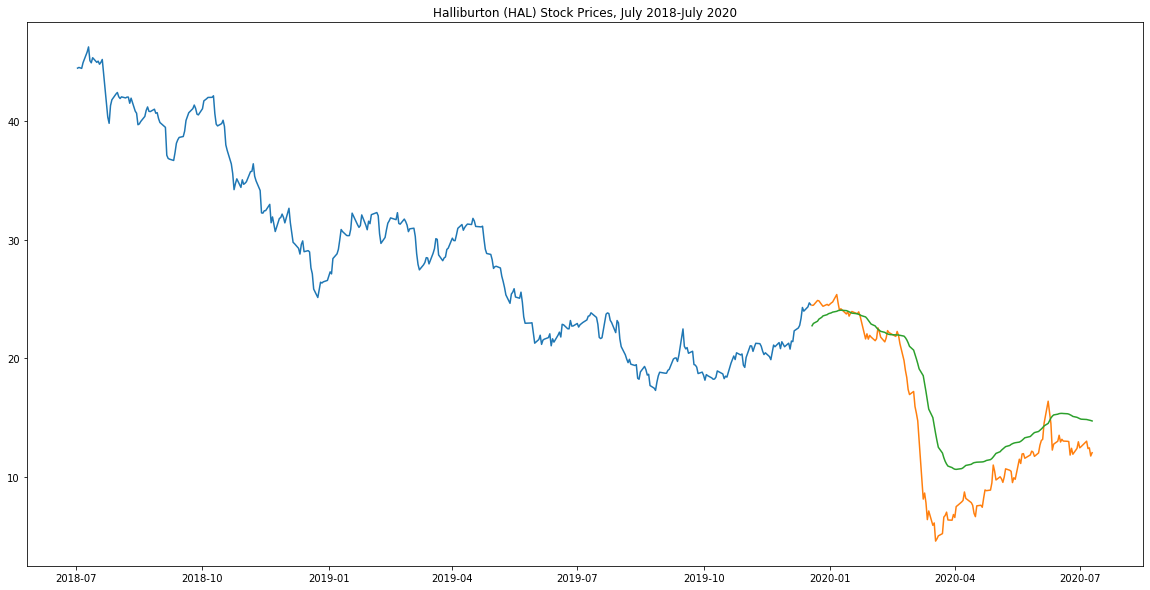

In [23]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Halliburton (TDOC) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/TDOC.png")